# US Politics This Week Ad Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#CONSTANTS
TEST_DATA_FILE = 'test_data.csv'
VIEWER_DATA_FILE = 'viewer_data.csv'
VIEWER_ID = 'viewer_id'
SAW_LOCAL_AD = 'test'
WATCHED_POLITICS = 'watched'

# 1. Read Test dataset and display columns

In [64]:
viewer_data = pd.read_csv(VIEWER_DATA_FILE)
test_data = pd.read_csv(TEST_DATA_FILE)
print(len(test_data))
test_data.head()

418026


,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0


In [ ]:
sns.pairplot(test_data[['tv_make', 'tv_size', 'uhd_capable', 'tv_provider', 'total_time_watched', 'watched', 'test']])

# 2. Check if Viewers who saw ads with local Mayors watched US Politics This Week less

let's first check for null values and duplicate viewer ids. Ok there are 6 duplicate viewer IDs.

In [65]:
print(f'Number of duplicate IDs: {len(test_data) -test_data[VIEWER_ID].nunique()}')
[print(col,test_data[col].isnull().sum()) for col in test_data.columns]

Number of duplicate IDs: 6
viewer_id 0
date 0
tv_make 0
tv_size 0
uhd_capable 0
tv_provider 52720
total_time_watched 0
watched 0
test 0


[None, None, None, None, None, None, None, None, None]

In [55]:
print(test_data[test_data.duplicated(subset=[VIEWER_ID],keep=False)][[VIEWER_ID,'watched','test']].sort_values(by=VIEWER_ID))

        viewer_id  watched  test
192975     337110        0     1
254424     337110        0     1
37198      353136        0     0
132589     353136        0     0
22603      393446        0     1
170071     393446        0     1
36143      567482        1     0
96757      567482        1     0
38343     1112405        0     0
93683     1112405        0     0
161327    1152006        0     0
295694    1152006        0     0


(array([213695.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 204325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

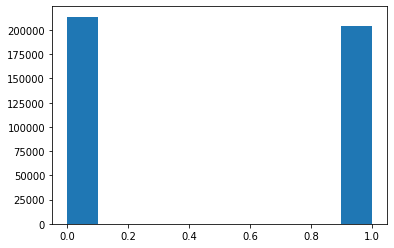

In [66]:
test_data = test_data.drop_duplicates(subset = [VIEWER_ID])
plt.hist(test_data[SAW_LOCAL_AD])

(array([395224.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  22802.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

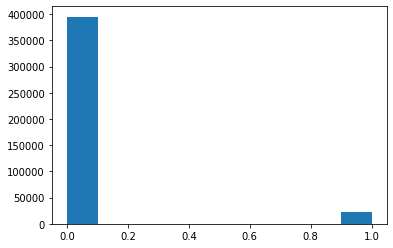

In [26]:
plt.hist(test_data[WATCHED_POLITICS])

In [76]:
dfs = []
names = ['saw local ad', 'no local ad']
saw_ad = test_data.loc[test_data[SAW_LOCAL_AD]==1]
no_ad = test_data.loc[test_data[SAW_LOCAL_AD]==0]
dfs.append(saw_ad)
dfs.append(no_ad)
for df, name in zip(dfs, names):
    print(f'{name} length: {len(df)} ---------')
    print(f'number watched: {len(df.loc[df[WATCHED_POLITICS]==1])}')
    print(f'number did not watch:{len(df.loc[df[WATCHED_POLITICS]==0])}')
    percent_watched = 100*len(df.loc[df[WATCHED_POLITICS]==1])/len(df)
    percent_not_watched = 100*len(df.loc[df[WATCHED_POLITICS]==0])/len(df)
    print(f'Saw Local Ad: Watched: {percent_watched} Did Not Watch: {percent_not_watched}')


saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 213695 ---------
number watched: 13447
number did not watch:200248
Saw Local Ad: Watched: 6.292613304008049 Did Not Watch: 93.70738669599196


So, viewers that saw the local ad watched US Politics This Week ~1.73% less than viewers who did not see the ad. This is not expected, but may be due to the samples not being stratified across users by age, gender, tv_size, etc evenly.

# Why less viewers that saw Local Ad watched US Politics This Week

Let's first merge in viewer data, and double check that we do not lose an viewers due to not having their viewer data

In [77]:
print(len(saw_local_ad))
saw_local_ad = pd.merge(saw_ad, viewer_data, how='left', on = VIEWER_ID )
print(len(saw_local_ad))
print(len(no_ad))
no_ad = pd.merge(no_ad, viewer_data, how = 'left', on = VIEWER_ID)
print(len(no_ad))


204325
204325
no ad
213695
213695
